# 0. Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

# Biblioteca que permitirá trabalhar com Redes Neurais
import tensorflow as tf
from tensorflow import keras

# 1. Importando o conjunto de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/datasets/winequality-red.csv')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Explorando a base de Dados

## 2.1 Exploração inicial

In [ ]:
nrows, ncols = wine.shape
print(f"N° de linhas: {nrows} \nN° de colunas: {ncols}")

N° de linhas: 1599 
N° de colunas: 12


In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
n_duplicates = wine.duplicated().sum()
print(f'Temos: {n_duplicates} instância duplicadas')

Temos: 240 instância duplicadas


In [ ]:
wine.isna().sum() # Não há valores ausentes

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Excluindo os valores duplicados
wine.drop_duplicates(inplace=True)

In [ ]:
nrows_new, ncols_new = wine.shape
print(f"Agora, o dataset possui: \nN° de linhas: {nrows_new} \nN° de colunas: {ncols_new}")

Agora, o dataset possui: 
N° de linhas: 1359 
N° de colunas: 12


In [ ]:
# Divisão treino x test
X = wine.drop(['quality'], axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, y_train.shape

((1087, 11), (1087,))

In [ ]:
df_train = X_train.merge(y_train, left_index=True, right_index=True)

## 2.2 Análise Univariada

In [ ]:
list_features = df_train.columns.tolist()

In [ ]:
print('Valores únicos \n==========================')
for feature in list_features:
    nuniques = df_train[feature].nunique()
    print(f'{feature}: {nuniques}')

Valores únicos 
fixed acidity: 96
volatile acidity: 138
citric acid: 80
residual sugar: 85
chlorides: 137
free sulfur dioxide: 57
total sulfur dioxide: 143
density: 399
pH: 88
sulphates: 89
alcohol: 64
quality: 6


In [ ]:
df_train[['fixed acidity', 'volatile acidity']].describe()

,fixed acidity,volatile acidity
count,1087.000000,1087.000000
mean,8.329715,0.532010
std,1.789372,0.185692
min,4.600000,0.160000
25%,7.100000,0.390000
50%,7.900000,0.520000
75%,9.300000,0.645000
max,15.900000,1.580000


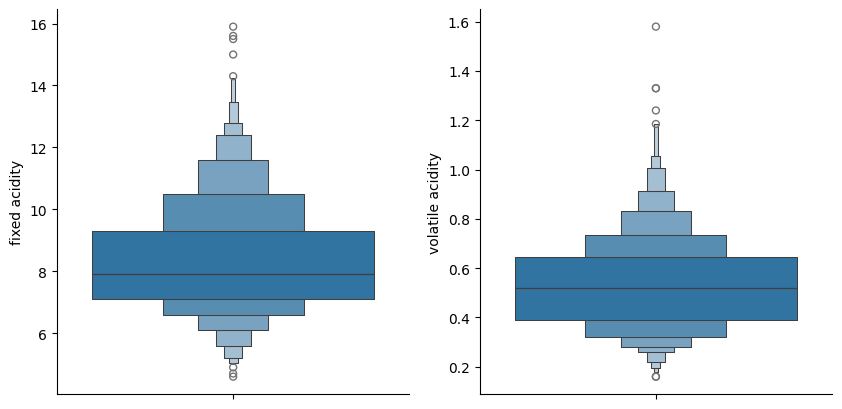

In [ ]:
plt.figure(figsize=(10,5))
axs = [plt.subplot(121), plt.subplot(122)]
sns.boxenplot(data=df_train, y='fixed acidity', ax=axs[0])
sns.boxenplot(data=df_train, y='volatile acidity', ax=axs[1])

sns.despine()

In [ ]:
df_train[['citric acid', 'residual sugar']].describe()

,citric acid,residual sugar
count,1087.000000,1087.000000
mean,0.272898,2.533211
std,0.196584,1.346875
min,0.000000,0.900000
25%,0.100000,1.900000
50%,0.260000,2.200000
75%,0.430000,2.600000
max,1.000000,15.500000


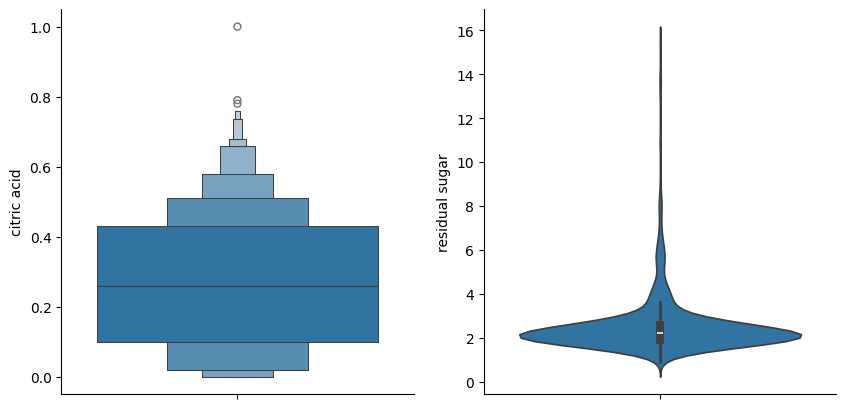

In [ ]:
plt.figure(figsize=(10,5))
axs = [plt.subplot(121), plt.subplot(122)]
sns.boxenplot(data=df_train, y='citric acid', ax=axs[0])
sns.violinplot(data=df_train, y='residual sugar', ax=axs[1])

sns.despine()

In [ ]:
df_train[['chlorides', 'free sulfur dioxide']].describe()

,chlorides,free sulfur dioxide
count,1087.000000,1087.000000
mean,0.087305,16.004140
std,0.047645,10.615658
min,0.012000,1.000000
25%,0.070000,7.000000
50%,0.079000,14.000000
75%,0.090000,22.000000
max,0.611000,72.000000


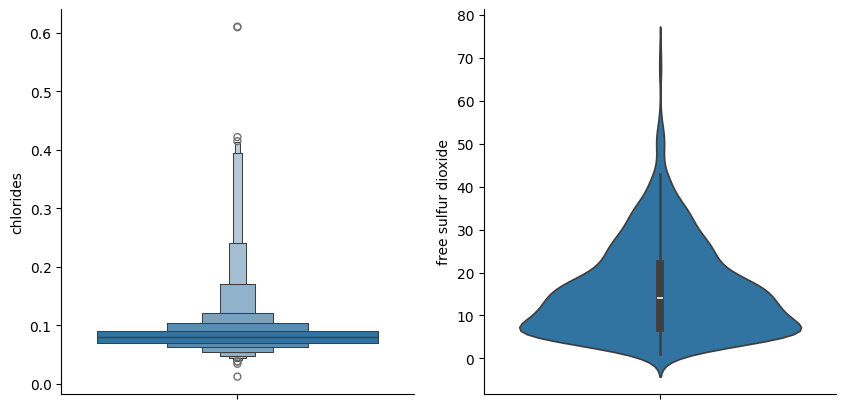

In [ ]:
plt.figure(figsize=(10,5))
axs = [plt.subplot(121), plt.subplot(122)]
sns.boxenplot(data=df_train, y='chlorides', ax=axs[0])
sns.violinplot(data=df_train, y='free sulfur dioxide', ax=axs[1])

sns.despine()

In [ ]:
df_train[['total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].describe()

,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,47.329807,0.996704,3.308583,0.655989,10.443714,5.625575
std,34.332869,0.001920,0.158854,0.169598,1.096847,0.824693
min,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,22.000000,0.995575,3.210000,0.550000,9.500000,5.000000
50%,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,64.000000,0.997870,3.400000,0.720000,11.200000,6.000000
max,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [ ]:
sns_graphics = {'boxenplot':sns.boxenplot, 'boxplot':sns.boxplot, 'viollini':sns.violinplot, 'kdeplot':sns.kdeplot}
plot_feature = [('total sulfur dioxide', 'viollini'), ('density','kdeplot'), ('pH','boxenplot'), ('sulphates', 'boxplot'), ('alcohol', 'boxplot')]

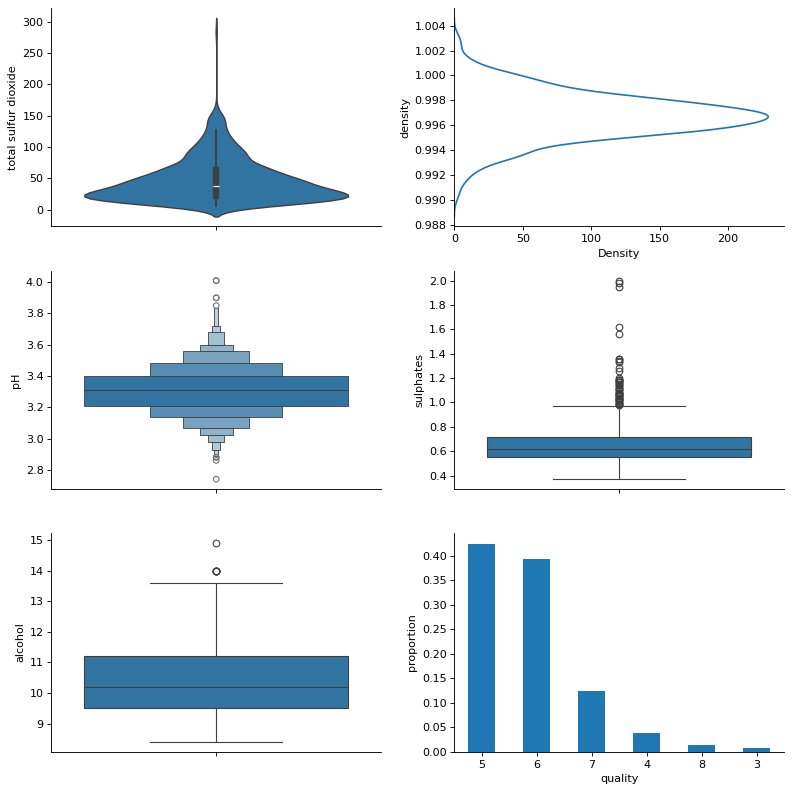

In [ ]:
plt.figure(figsize=(10,10), dpi=80)

axs = [plt.subplot(321), plt.subplot(322) , plt.subplot(323),
       plt.subplot(324), plt.subplot(325) , plt.subplot(326)]

for i, (feature, grafic) in enumerate(plot_feature):
  sns_graphics[grafic](data=df_train, y=feature, ax=axs[i])

df_train['quality'].value_counts(1).sort_values(ascending=False).plot.bar(ax=axs[-1], rot=0)
axs[-1].set_xlabel('quality')
axs[-1].set_ylabel('proportion')

plt.tight_layout()
sns.despine()

Insigths:
1. Apesar da pontuação poder variar de 0 a 10, a menor pontução para um vinho foi 3 e máxima foi 8. Além disso, cerca de 75% dos vinhos, possuem nota menor ou igual a 6. Ou seja, a maioria dos vinhos da amostras foram classificados como mediano. A média geral das pontuações é de, aproximadamente, 5.63;


## 2.3 Análise Bivariada

In [ ]:
group_quality = df_train.groupby(by='quality').describe()

In [ ]:
for i, feature in enumerate(list_features[:6]):
    print(list_features[i])
    group_quality[(list_features[i], 'cv')] = group_quality[list_features[i]]['std']/group_quality[list_features[i]]['mean']
    display(group_quality[list_features[i]])
    print('\n')

fixed acidity


,count,mean,std,min,25%,50%,75%,max,cv
quality,,,,,,,,,
3,8.0,8.300000,1.756620,6.7,7.250,7.50,8.825,11.6,0.211641
4,42.0,7.800000,1.712080,4.6,6.800,7.50,8.375,12.5,0.219497
5,461.0,8.183948,1.583159,5.0,7.100,7.80,9.000,15.9,0.193447
6,428.0,8.348131,1.870872,4.7,7.000,7.90,9.425,14.3,0.224107
7,134.0,8.960448,2.034811,4.9,7.625,8.80,10.175,15.6,0.227088
8,14.0,8.135714,2.178075,5.0,7.200,7.85,9.325,12.6,0.267718




volatile acidity


,count,mean,std,min,25%,50%,75%,max,cv
quality,,,,,,,,,
3,8.0,0.948750,0.327793,0.58,0.7225,0.9275,1.06125,1.580,0.345500
4,42.0,0.675833,0.200228,0.33,0.5225,0.6525,0.81875,1.115,0.296269
5,461.0,0.584805,0.172858,0.18,0.4600,0.5900,0.68000,1.330,0.295582
6,428.0,0.496110,0.166386,0.16,0.3700,0.4900,0.60000,1.040,0.335381
7,134.0,0.404552,0.144255,0.20,0.3000,0.3600,0.48000,0.915,0.356580
8,14.0,0.441429,0.159560,0.26,0.3350,0.3900,0.52750,0.850,0.361462




citric acid


,count,mean,std,min,25%,50%,75%,max,cv
quality,,,,,,,,,
3,8.0,0.161250,0.260079,0.00,0.0150,0.035,0.1600,0.66,1.612893
4,42.0,0.166905,0.203608,0.00,0.0225,0.085,0.2400,1.00,1.219903
5,461.0,0.241236,0.180196,0.00,0.0900,0.220,0.3600,0.79,0.746966
6,428.0,0.283505,0.195723,0.00,0.1075,0.270,0.4425,0.78,0.690370
7,134.0,0.377985,0.197525,0.00,0.3200,0.400,0.4900,0.76,0.522574
8,14.0,0.367143,0.219560,0.03,0.2550,0.335,0.5300,0.72,0.598023




residual sugar


,count,mean,std,min,25%,50%,75%,max,cv
quality,,,,,,,,,
3,8.0,2.956250,1.389100,1.8,2.100,2.15,3.6125,5.7,0.469886
4,42.0,2.795238,1.963937,1.3,1.925,2.10,3.2500,12.9,0.702601
5,461.0,2.541106,1.354219,1.2,1.900,2.20,2.6000,15.5,0.532925
6,428.0,2.441472,1.272103,0.9,1.900,2.20,2.5000,13.9,0.521039
7,134.0,2.710075,1.339563,1.2,1.900,2.30,2.8000,8.3,0.494290
8,14.0,2.357143,0.985053,1.4,1.800,2.00,2.4500,5.2,0.417901




chlorides


,count,mean,std,min,25%,50%,75%,max,cv
quality,,,,,,,,,
3,8.0,0.101625,0.045698,0.061,0.07700,0.0830,0.1070,0.200,0.449669
4,42.0,0.091238,0.084299,0.045,0.06725,0.0795,0.0885,0.610,0.923949
5,461.0,0.093098,0.054447,0.039,0.07400,0.0820,0.0940,0.611,0.584840
6,428.0,0.084374,0.038074,0.034,0.06800,0.0780,0.0880,0.414,0.451256
7,134.0,0.076672,0.031566,0.012,0.06200,0.0730,0.0865,0.358,0.411699
8,14.0,0.067929,0.013269,0.044,0.06025,0.0715,0.0775,0.086,0.195340




free sulfur dioxide


,count,mean,std,min,25%,50%,75%,max,cv
quality,,,,,,,,,
3,8.0,7.500000,5.424811,3.0,5.00,5.5,7.00,20.0,0.723308
4,42.0,12.642857,9.514614,3.0,6.00,11.0,14.75,41.0,0.752568
5,461.0,17.136659,11.163449,3.0,8.00,15.0,24.00,68.0,0.651437
6,428.0,15.886682,9.998800,1.0,8.00,14.0,21.00,72.0,0.629383
7,134.0,14.089552,10.449458,3.0,6.00,11.0,17.00,54.0,0.741646
8,14.0,15.571429,11.712677,3.0,6.25,13.5,18.50,42.0,0.752190


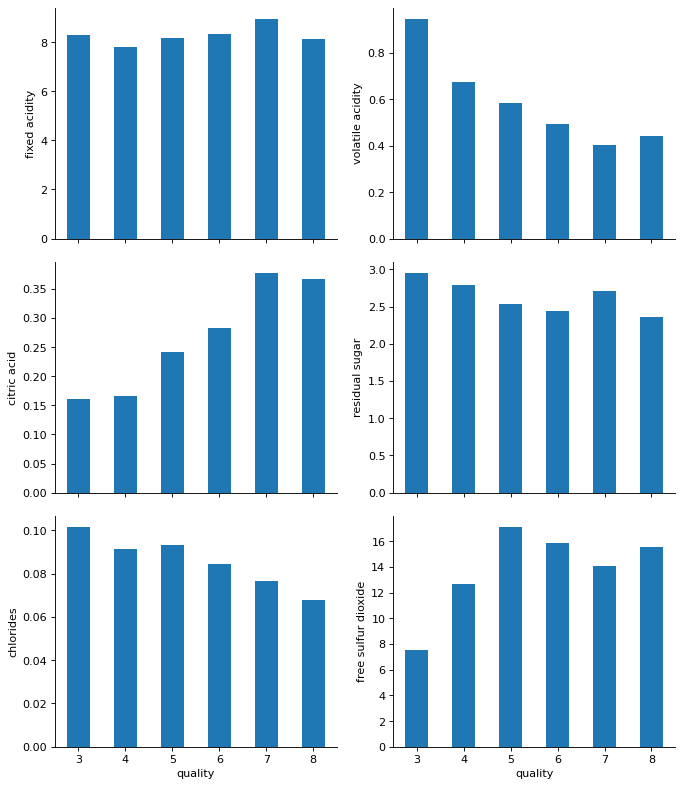

In [ ]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 12), dpi=80)
axs = axs.flatten(order='C')

for i, feature in enumerate(list_features[:6]):
    group_quality[feature]['mean'].plot.bar(ax=axs[i], rot=0)
    axs[i].set_ylabel(feature)

sns.despine()
plt.subplots_adjust(hspace=0.1)

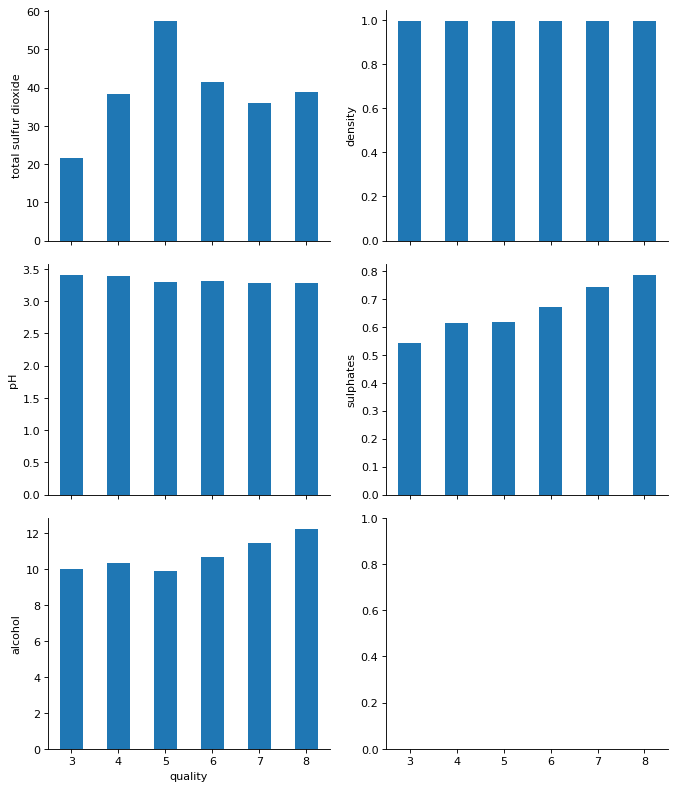

In [ ]:
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 12), dpi=80)
axs = axs.flatten(order='C')

for i, feature in enumerate(list_features[6:-1]):
    group_quality[feature]['mean'].plot.bar(ax=axs[i], rot=0)
    axs[i].set_ylabel(feature)

sns.despine()
plt.subplots_adjust(hspace=0.1)

> Insgiths

1. Aparentemente, a `volatile acidity` contribui de forma inversa para a qualidade do vinho. A tendencia média é que quanto menor 'volatile acidity', mais chance do vinho ser classificado como bom. Veja na figura 02, que a medida que o score aumenta, menor o valor dessa variável.

2. As variáveis `citric acid`, `chlorides`, `sulphates`, parecem ter uma correlação positiva com a quaidade do vinho. Em média, a medida que elas aumenta a pntuação também tende a aumentar. A `alcohol`, aparenta ter uma relação positiva 'discretamente'.

In [ ]:
corr = df_train.corr()

<Axes: >

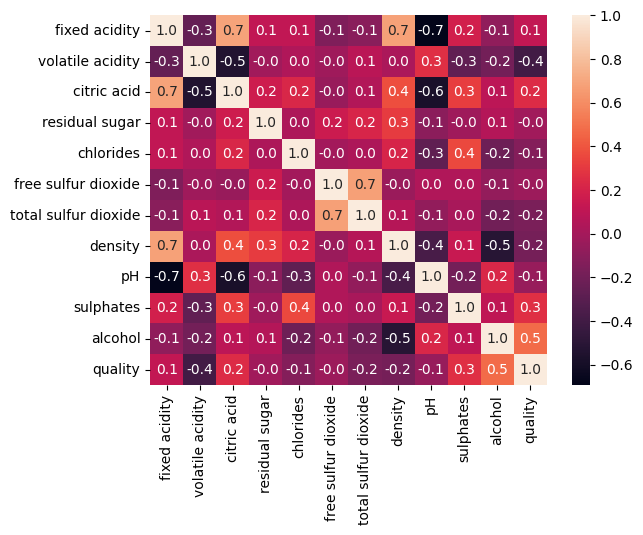

In [ ]:
sns.heatmap(data=corr, annot=True, fmt=".1f")

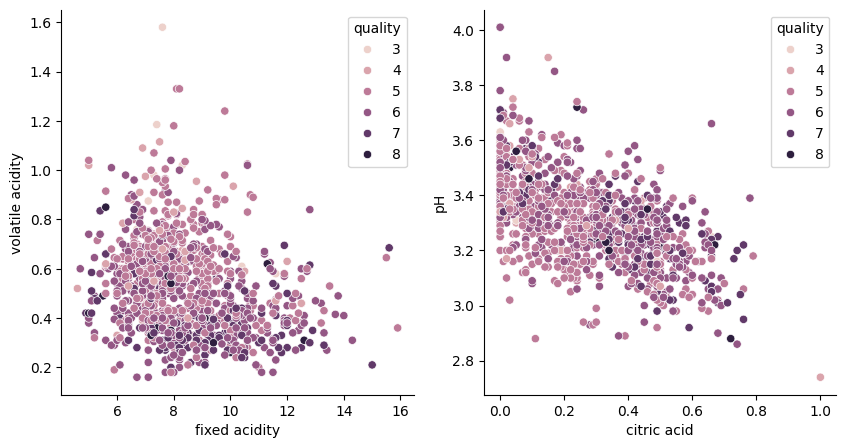

In [ ]:
plt.figure(figsize=(10,5))
axs = [plt.subplot(121), plt.subplot(122)]
sns.scatterplot(data=df_train, x='fixed acidity', y='volatile acidity', hue='quality', ax=axs[0])
sns.scatterplot(data=df_train, x='citric acid', y='pH', hue='quality', ax=axs[1])

sns.despine()

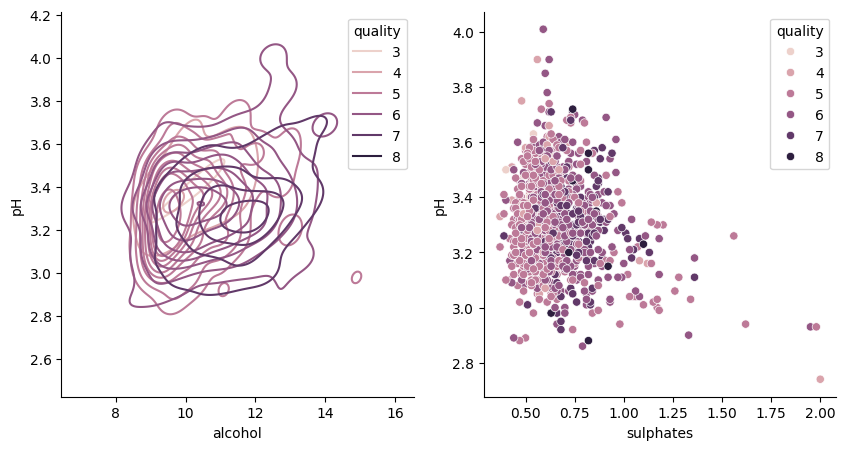

In [ ]:
plt.figure(figsize=(10,5))
axs = [plt.subplot(121), plt.subplot(122)]
sns.kdeplot(data=df_train, x='alcohol', y='pH', hue='quality', ax=axs[0])
sns.scatterplot(data=df_train, x='sulphates', y='pH', hue='quality', ax=axs[1])

sns.despine()

# 3. Modelagem

## 3.1 Processamento dos dados

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

## 3.2 Treinando o modelo

In [ ]:
# Definindo o número de folds
n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Para armazenar o desempenho de cada fold
mse_scores = []

for train_index, val_index in kf.split(X_train_transformed):
    # Dividir em treino e validação
    X_train_fold, X_val_fold = X_train_transformed[train_index], X_train_transformed[val_index]
    y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]

    # Criar o modelo
    model = keras.models.Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(15, activation="relu"),
        keras.layers.Dense(1)
    ])

    # Compilar o modelo
    model.compile(loss="mean_squared_error", optimizer="sgd")

    # Treinar o modelo
    model.fit(X_train_fold, y_train_fold, epochs=20, verbose=0)

    # Avaliar o modelo
    mse = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    mse_scores.append(mse)

In [ ]:
# Exibindo os resultados
print(f"Mean MSE over {n_splits} folds: {np.mean(mse_scores):.4f}")
print(f"Standard Deviation of MSE: {np.std(mse_scores):.4f}")

Mean MSE over 5 folds: 0.5279
Standard Deviation of MSE: 0.0636


In [ ]:
# Criando o modelo final
model_final = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1)
])

# Compilando o modelo
model_final.compile(loss="mean_squared_error", optimizer="sgd")

# Treinando o modelo em todo o conjunto de treinamento
model_final.fit(X_train, y_train, epochs=20, verbose=0)

# Avaliando o modelo no conjunto de teste
mse_test = model_final.evaluate(X_test, y_test, verbose=0)

print(f"MSE no conjunto de teste: {mse_test:.4f}")

MSE no conjunto de teste: 0.6711


# 4. Resultado Final

* Aparentemente, o modelo sobreajustou um pouco aos dados de treinamento. Isso pode ser visto ao comparar o erro no conjunto de teste e de generalização(estimado por validação cruzada).

  - Erro de generalização: 0.5279 +/- 0.0636
  - Erro no conjunto de teste: 0.6711

* Porém, como não houve uma discrepância forte, podemos descartar a possibilidade de overfiting extremo.